In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn


Dataset Shape: (45211, 17)

✅ Model Accuracy: 0.90


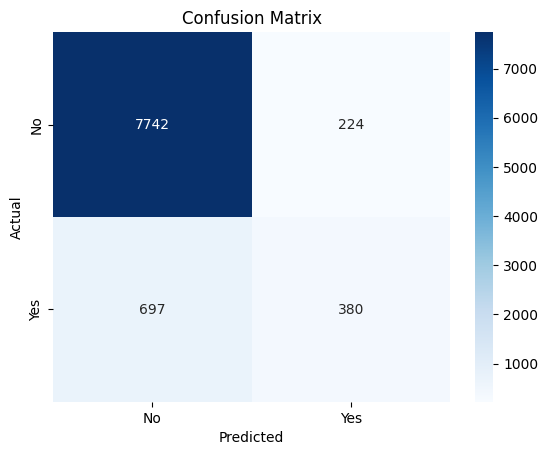


🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7966
           1       0.63      0.35      0.45      1077

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



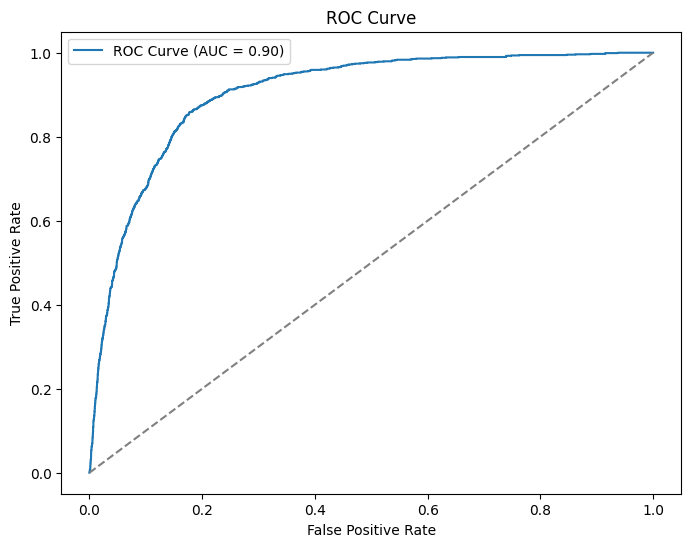

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load dataset (Change the file path)
file_path = "/content/drive/MyDrive/Colab Notebooks/Datasets/bank-full.csv"
df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Shape:", df.shape)
# Convert categorical variables into numerical using One-Hot Encoding
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert target variable ('y') to binary (0 = No, 1 = Yes)
df["y"] = df["y"].map({"no": 0, "yes": 1})

# Define features (X) and target variable (y)
X = df.drop(columns=["y"])  # Features
y = df["y"]  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



🔹 Feature Importance (Logistic Regression Weights):
                Feature    Weight
3              duration  1.094011
40     poutcome_success  0.419041
33            month_jun  0.173054
34            month_mar  0.164536
21   education_tertiary  0.161774
37            month_oct  0.128544
38            month_sep  0.101596
2                   day  0.088450
20  education_secondary  0.067773
6              previous  0.059232


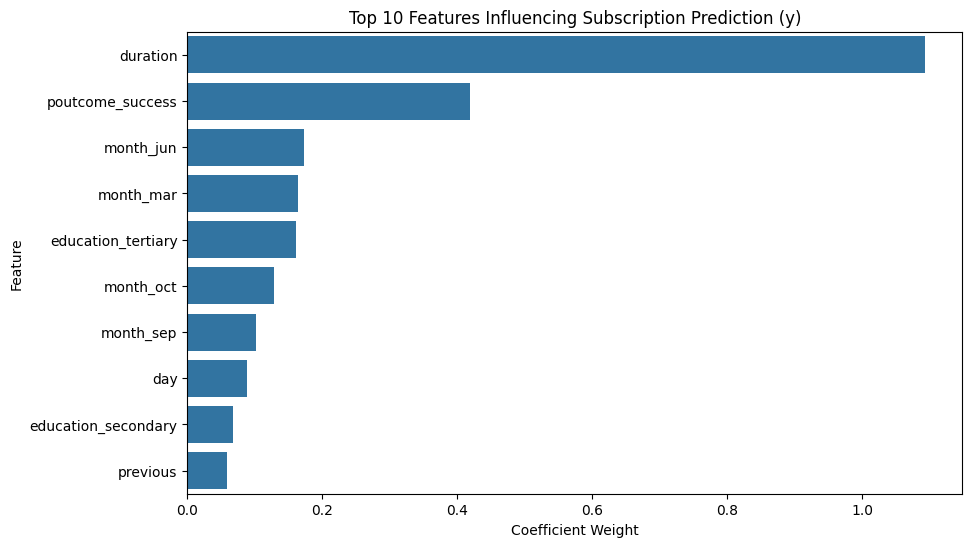

In [3]:
# Get feature weights (coefficients)
feature_importance = pd.DataFrame({"Feature": X.columns, "Weight": model.coef_[0]})
feature_importance = feature_importance.sort_values(by="Weight", ascending=False)

# Display top 10 features
print("\n🔹 Feature Importance (Logistic Regression Weights):")
print(feature_importance.head(10))

# Plot top feature contributions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x="Weight", y="Feature", data=feature_importance[:10])  # Show top 10 features
plt.title("Top 10 Features Influencing Subscription Prediction (y)")
plt.xlabel("Coefficient Weight")
plt.ylabel("Feature")
plt.show()

